<a href="https://colab.research.google.com/github/Nagasrineelamshetty/OIBSIP--DataScience/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
# 2. Load Dataset
df = pd.read_csv('spam.csv', encoding='latin-1')  # Use correct encoding to avoid errors
df = df[['v1', 'v2']]  # Keep only useful columns
df.columns = ['label', 'message']  # Rename for clarity


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Class distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64


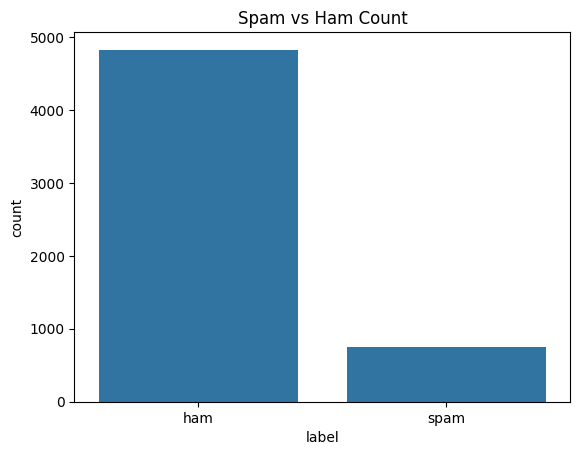

In [12]:
# 3. Data Exploration
print(df.head())
print("\nClass distribution:\n", df['label'].value_counts())
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Count")
plt.show()

In [13]:
# 4. Convert Labels to Binary
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

In [14]:
# 5. Train-Test Split
X = df['message']
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# 6. Create Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),          # Convert text to bag-of-words
    ('tfidf', TfidfTransformer()),        # Term frequency-inverse document frequency
    ('clf', MultinomialNB()),             # Naive Bayes classifier
])

In [16]:
# 7. Train the Model
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [17]:
# 8. Make Predictions
y_pred = text_clf.predict(X_test)

In [18]:
# 9. Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9623318385650225

Confusion Matrix:
 [[965   0]
 [ 42 108]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [19]:
# 10. Test on Custom Input
test_msg = ["Congratulations! You've won a free cruise to Bahamas. Call now!",
            "Hey, are we still meeting for lunch tomorrow?"]
preds = text_clf.predict(test_msg)
for msg, label in zip(test_msg, preds):
    print(f"Message: '{msg}' -> {'Spam' if label == 1 else 'Ham'}")

Message: 'Congratulations! You've won a free cruise to Bahamas. Call now!' -> Spam
Message: 'Hey, are we still meeting for lunch tomorrow?' -> Ham
